In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
naames = pd.read_csv('naames-mrg01-c130_merge_20151112_R5_thru20151123.ict', skiprows=223)

In [3]:
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})

In [10]:
naames_gpd = gpd.GeoDataFrame(naames, 
                            geometry=gpd.points_from_xy(naames[' LONGITUDE'], naames[' LATITUDE']), 
                            crs='epsg:4326')

<AxesSubplot:>

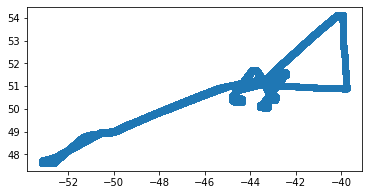

In [33]:
naames_gpd_pc.plot()

<AxesSubplot:>

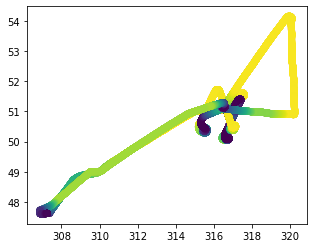

In [11]:
naames_gpd.plot(column=' ALTP')

## Maps

In [4]:
import cartopy.crs as ccrs

In [ ]:
naames_gpd

In [22]:
# Cool!
naames_gpd_pc.bounds  # gives bounds for each row of the dataframe
naames_gpd_pc.total_bounds  # full unioned dataframe

,minx,miny,maxx,maxy
0,-52.770821,47.623684,-52.770821,47.623684
1,-52.770821,47.623684,-52.770821,47.623684
2,-52.770821,47.623684,-52.770821,47.623684
3,-52.770821,47.623684,-52.770821,47.623684
4,-52.770821,47.623684,-52.770821,47.623684
...,...,...,...,...
34394,-52.750191,47.624510,-52.750191,47.624510
34395,-52.750138,47.624485,-52.750138,47.624485
34396,-52.750087,47.624458,-52.750087,47.624458
34397,-52.750039,47.624428,-52.750039,47.624428


In [36]:
naames_gpd_pc['geometry']

0        POINT (-52.771 47.624)
1        POINT (-52.771 47.624)
2        POINT (-52.771 47.624)
3        POINT (-52.771 47.624)
4        POINT (-52.771 47.624)
                  ...          
34394    POINT (-52.750 47.625)
34395    POINT (-52.750 47.624)
34396    POINT (-52.750 47.624)
34397    POINT (-52.750 47.624)
34398    POINT (-52.750 47.624)
Name: geometry, Length: 34399, dtype: geometry

In [ ]:
crs = ccrs.PlateCarree()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
naames_gpd_pc = naames_gpd.to_crs(crs_proj4)

Relevant SO:
https://gis.stackexchange.com/questions/285568/displaying-geopandas-points-with-cartopy
https://stackoverflow.com/questions/25340427/how-to-add-a-point-feature-shapefile-to-map-using-cartopy


<GeoAxesSubplot:title={'center':'Flight Track Altitude'}>

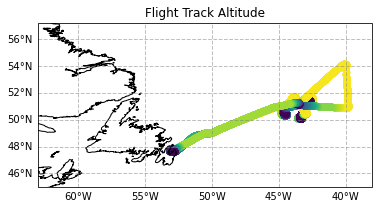

In [56]:
fig = plt.figure()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.set_title('Flight Track Altitude')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels, gl.right_labels = False, False

ax.set_extent([-63, -38, 45, 57])
naames_gpd_pc.plot(ax=ax, column=' ALTP')

# ax.add_geometries(naames_gpd_pc['geometry'], crs=ccrs.PlateCarree(), edgecolor='black', facecolor='black')

In [15]:
naames_gpd_pc

,Fractional_Day,UTC,JDAY,INDEX,FLIGHT,LOCAL_SUN_TIME,LATITUDE,LONGITUDE,ALTP,PRESSURE,...,TOD-1627nm_4STAR,CTH_RSP,COT_RSP,Reff_RSP,Veff_RSP,COT_rad_1590nm_RSP,Reff_rad_1590nm_RSP,COT_rad_2260nm_RSP,Reff_rad_2260nm_RSP,geometry
0,316.46124,39851,316,100001.0,1.0,7.551806,47.623684,307.229179,0.098450,1001.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.771 47.624)
1,316.46125,39852,316,100002.0,1.0,7.552084,47.623684,307.229179,0.098755,1001.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.771 47.624)
2,316.46126,39853,316,100003.0,1.0,7.552362,47.623684,307.229179,0.099060,1001.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.771 47.624)
3,316.46127,39854,316,100004.0,1.0,7.552640,47.623684,307.229179,0.099365,1001.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.771 47.624)
4,316.46128,39855,316,100005.0,1.0,7.552918,47.623684,307.229179,0.099060,1001.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.771 47.624)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34394,316.85932,74245,316,68859.0,1.0,17.107071,47.624510,307.249809,0.127406,998.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.750 47.625)
34395,316.85933,74246,316,68860.0,1.0,17.107352,47.624485,307.249862,0.126492,998.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.750 47.624)
34396,316.85934,74247,316,68861.0,1.0,17.107633,47.624458,307.249913,0.125882,998.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.750 47.624)
34397,316.85935,74248,316,68862.0,1.0,17.107914,47.624429,307.249961,0.126187,998.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-52.750 47.624)


## Geopandas Cartopy tutorial

In [24]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

In [29]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = naames_gpd.to_crs(crs_proj4)

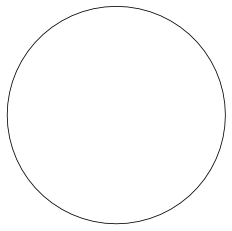

In [30]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

In [3]:
naames

,Fractional_Day,UTC,JDAY,INDEX,FLIGHT,LOCAL_SUN_TIME,LATITUDE,LONGITUDE,ALTP,PRESSURE,...,TOD-1559nm_4STAR,TOD-1627nm_4STAR,CTH_RSP,COT_RSP,Reff_RSP,Veff_RSP,COT_rad_1590nm_RSP,Reff_rad_1590nm_RSP,COT_rad_2260nm_RSP,Reff_rad_2260nm_RSP
0,316.46124,39851,316,100001.0,1.0,7.551806,47.623684,307.229179,0.098450,1001.45,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
1,316.46125,39852,316,100002.0,1.0,7.552084,47.623684,307.229179,0.098755,1001.42,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
2,316.46126,39853,316,100003.0,1.0,7.552362,47.623684,307.229179,0.099060,1001.38,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
3,316.46127,39854,316,100004.0,1.0,7.552640,47.623684,307.229179,0.099365,1001.34,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
4,316.46128,39855,316,100005.0,1.0,7.552918,47.623684,307.229179,0.099060,1001.40,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166512,327.80041,69155,327,467510.0,5.0,15.694111,47.613698,307.263749,0.049682,1007.29,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
166513,327.80042,69156,327,467511.0,5.0,15.694391,47.613681,307.263777,0.045415,1007.79,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
166514,327.80043,69157,327,467512.0,5.0,15.694670,47.613668,307.263803,0.042062,1008.19,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
166515,327.80044,69158,327,467513.0,5.0,15.694950,47.613661,307.263826,0.040234,1008.39,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0


In [4]:
day1 = naames[naames[' Fractional_Day'] < 317]

In [10]:
subset = day1
# subset = subset.set_index(' Fractional_Day')
subset = subset.replace({-999999: np.nan})

In [23]:
naames.columns

Index([' Fractional_Day', '  UTC', ' JDAY', ' INDEX', ' FLIGHT',
       ' LOCAL_SUN_TIME', ' LATITUDE', ' LONGITUDE', ' ALTP', ' PRESSURE',
       ' TEMPERATURE', ' THETA', ' O3COLUMN', ' SZA', ' WNS', ' WND',
       ' GPS_ALT', ' GRD_SPD', ' TAS', ' IAS', ' MachNumber', ' VerticalSpeed',
       ' HDG', ' TRK', ' DriftAngle', ' PITCH', ' ROLL',
       ' PotentialTemp_Hskping', ' Dewpoint', ' TotalAirTemp', ' IR_SurfTemp',
       ' IR_ZenithTemp', ' CabinPressure', ' SolarZenithAngle',
       ' AircraftSunElevation', ' SunAzimuth', ' AircraftSunAzimuth',
       ' H2O_MixingRatio_Hskping', ' H2O_VaporPressure_Hskping',
       ' H2O_SatVaporPressureWater_Hskping',
       ' H2O_SatVaporPressureIce_Hskping', ' H2O_RelativeHumidity_Hskping',
       ' AOT_hi', ' HPD_Kd_slope', ' HPD_ocean_bbp5', ' HPD_ocean_bbp10',
       ' Pstat_mb', ' Tstat_C', ' Theta_K', ' H2O_MR_gkg_LICOR',
       ' H2Ov_ppmv_LICOR', ' Heading_deg', ' U_FastMeas', ' V_FastMeas',
       ' W_FastMeas', ' CO_MixingRatio_LAR

## Vertical profile

In [22]:
pd.set_option('display.max_colwidth', 80)
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 1000

In [38]:
naames.columns

Index([' Fractional_Day', '  UTC', ' JDAY', ' INDEX', ' FLIGHT',
       ' LOCAL_SUN_TIME', ' LATITUDE', ' LONGITUDE', ' ALTP', ' PRESSURE',
       ' TEMPERATURE', ' THETA', ' O3COLUMN', ' SZA', ' WNS', ' WND',
       ' GPS_ALT', ' GRD_SPD', ' TAS', ' IAS', ' MachNumber', ' VerticalSpeed',
       ' HDG', ' TRK', ' DriftAngle', ' PITCH', ' ROLL',
       ' PotentialTemp_Hskping', ' Dewpoint', ' TotalAirTemp', ' IR_SurfTemp',
       ' IR_ZenithTemp', ' CabinPressure', ' SolarZenithAngle',
       ' AircraftSunElevation', ' SunAzimuth', ' AircraftSunAzimuth',
       ' H2O_MixingRatio_Hskping', ' H2O_VaporPressure_Hskping',
       ' H2O_SatVaporPressureWater_Hskping',
       ' H2O_SatVaporPressureIce_Hskping', ' H2O_RelativeHumidity_Hskping',
       ' AOT_hi', ' HPD_Kd_slope', ' HPD_ocean_bbp5', ' HPD_ocean_bbp10',
       ' Pstat_mb', ' Tstat_C', ' Theta_K', ' H2O_MR_gkg_LICOR',
       ' H2Ov_ppmv_LICOR', ' Heading_deg', ' U_FastMeas', ' V_FastMeas',
       ' W_FastMeas', ' CO_MixingRatio_LAR

In [42]:
subset

,UTC,JDAY,INDEX,FLIGHT,LOCAL_SUN_TIME,LATITUDE,LONGITUDE,ALTP,PRESSURE,TEMPERATURE,...,TOD-1559nm_4STAR,TOD-1627nm_4STAR,CTH_RSP,COT_RSP,Reff_RSP,Veff_RSP,COT_rad_1590nm_RSP,Reff_rad_1590nm_RSP,COT_rad_2260nm_RSP,Reff_rad_2260nm_RSP
Fractional_Day,,,,,,,,,,,,,,,,,,,,,
316.46124,39851,316,100001.0,1.0,7.551806,47.623684,307.229179,0.098450,1001.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.46125,39852,316,100002.0,1.0,7.552084,47.623684,307.229179,0.098755,1001.42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.46126,39853,316,100003.0,1.0,7.552362,47.623684,307.229179,0.099060,1001.38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.46127,39854,316,100004.0,1.0,7.552640,47.623684,307.229179,0.099365,1001.34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.46128,39855,316,100005.0,1.0,7.552918,47.623684,307.229179,0.099060,1001.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316.85932,74245,316,68859.0,1.0,17.107071,47.624510,307.249809,0.127406,998.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.85933,74246,316,68860.0,1.0,17.107352,47.624485,307.249862,0.126492,998.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316.85934,74247,316,68861.0,1.0,17.107633,47.624458,307.249913,0.125882,998.21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel=' Fractional_Day'>

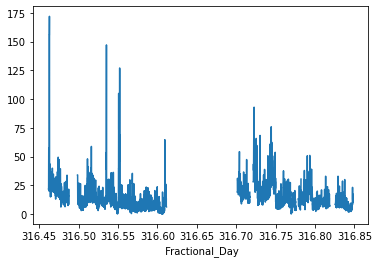

In [43]:
subset[' BC_mass'].plot()

Text(0, 0.5, 'Altitude')

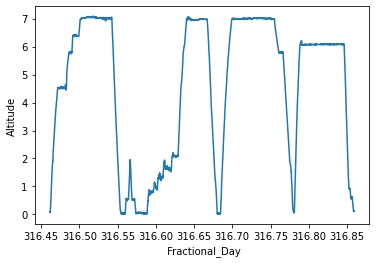

In [50]:
subset[' ALTP'].plot()  # this is a line plot
plt.ylabel('Altitude')

Text(0, 0.5, 'Altitude')

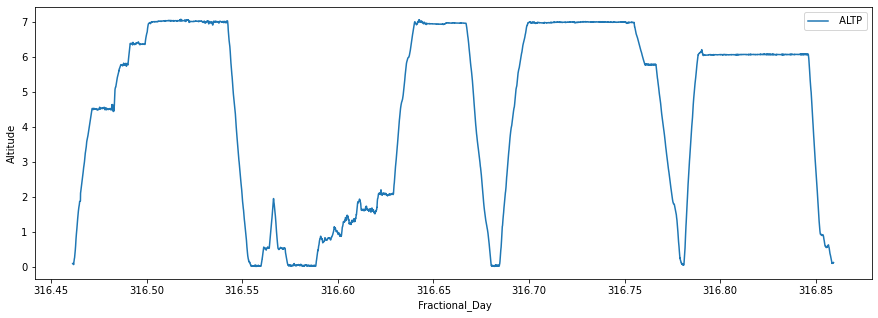

In [70]:
# After index has been reset
subset.plot(x=' Fractional_Day', y=' ALTP')
plt.ylabel('Altitude')

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [ ]:
subset = subset.reset_index().rename({'index': ' Fractional_Day'})

Text(0, 0.5, 'Altitude')

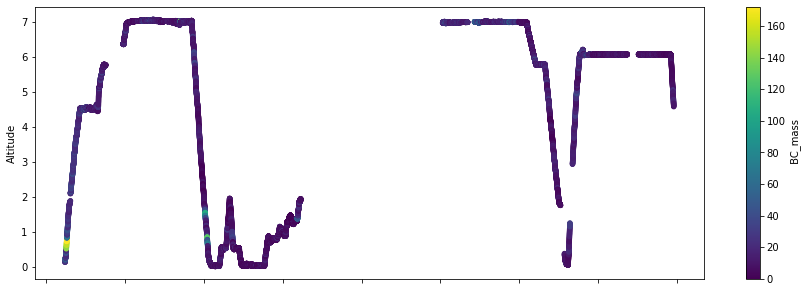

In [66]:
# Sounds like there was an error in a pandas release and using either c or colormap causes
# the x labels to get dropped.
subset.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass', colormap='viridis')
plt.ylabel('Altitude')

In [67]:
naames[[' Fractional_Day', ' ALTP', ' BC_mass']].describe()

,Fractional_Day,ALTP,BC_mass
count,166517.000000,166517.000000,166517.000000
mean,321.395381,-10432.737290,-147900.094891
std,3.766646,101629.581981,355011.049722
min,316.461240,-999999.000000,-999999.000000
25%,318.518760,1.922678,0.200000
50%,321.599850,6.295034,2.700000
75%,322.763020,6.399886,7.100000
max,327.800450,7.084162,6298.500000


## On a Map

Good longer term practice problem? -- cleaning the -99999 from the lat/lon dataset

In [71]:
import geopandas as gpd

In [100]:
# Drop columns where Latitude or Longitude are nan
dayq = day1.replace({-999999.0: np.nan})
day1 = day1[day1[' LONGITUDE'].notna()]
day1 = day1[day1[' LATITUDE'].notna()]

# day1[lat].min() used for checking

In [102]:
day1_gpd = gpd.GeoDataFrame(day1, geometry=gpd.points_from_xy(day1[' LONGITUDE'], day1[' LATITUDE']))

**Teaching point** always know what your nodata value is! When you get something that is 1e6 that is likely -9 5 times

<AxesSubplot:>

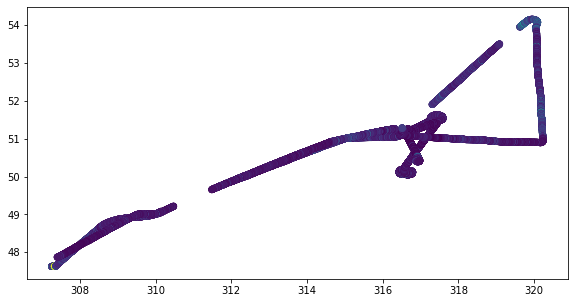

In [104]:
# Plotting with the default .plt interface
day1_gpd.plot(column=' BC_mass')

<AxesSubplot:>

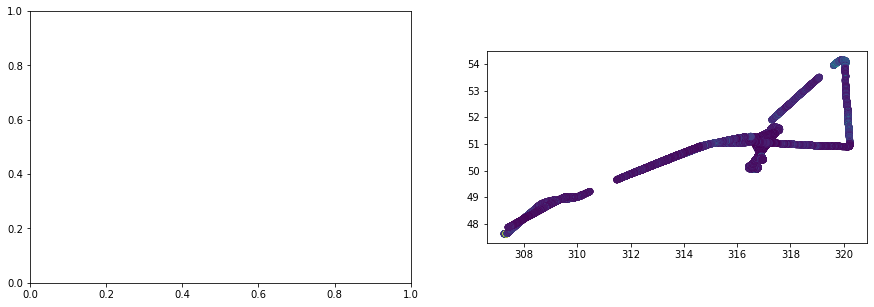

In [114]:
# Plotting onto another set of axis
fig, (ax1, ax2) = plt.subplots(1, 2)

day1_gpd.plot(column=' BC_mass', ax=ax2)  # You give the axis as an argument to do this

Another idea of a common problem to tackle as a group: mismatching projections.

What does cartopy bring? Seems like the basemap. Also some reprojecting, but we have that pretty well in geopandas already.

Matplotlib has axes. What cartopy adds is another layer - GeoAxes that are still matplotlib, but now they have a projection.

- I think inheritance as a concept will be a worthwhile learning point, even if students aren't doing OOP.
- https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

In [ ]:
from cartopy import crs as ccrs

<GeoAxesSubplot:>

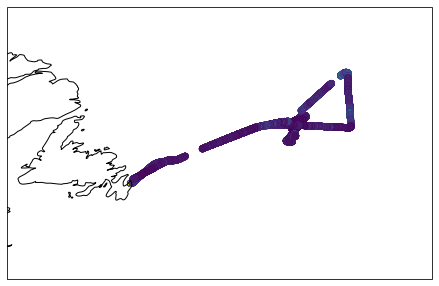

In [128]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([300, 325, 58, 42], crs=ccrs.PlateCarree())

day1_gpd.plot(column=' BC_mass', ax=ax)

_Once I understand better about adding colorbars and customizing maps, a good wrap up to this lesson would be to demo doing that here_

## Color in matplotlib

- Ways of specifying color - RGB, hex, written name

Text(0, 0.5, 'Altitude')

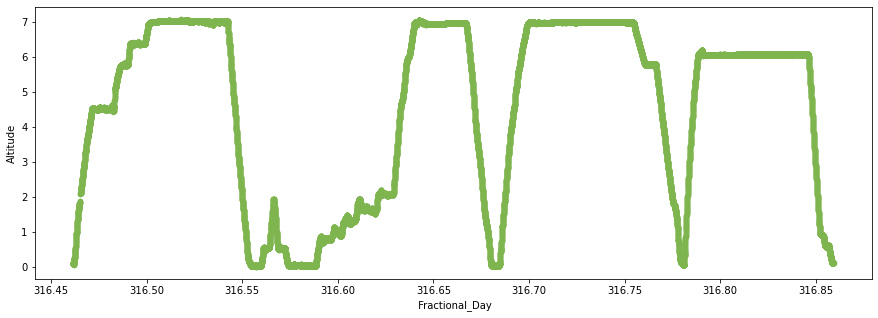

In [17]:
# specifying color of the line using hexidecimal
# c = 'orange' also works
subset.plot.scatter(x=' Fractional_Day', y=' ALTP', c='#7eb54e')
plt.ylabel('Altitude')

#### Color components
- color specifies the literal value we want for our dot. This could be the same color for every single point (orange) or it could be a different value for every point (ex. giving another column as a color)
- In the case of different color values for every point we can specify a colormap to determine the colors that the different values should correspond to.
- The colorbar refers specifically to the visual element on the side that informs the viewer which values correspond to which colors.

Text(0, 0.5, 'Altitude')

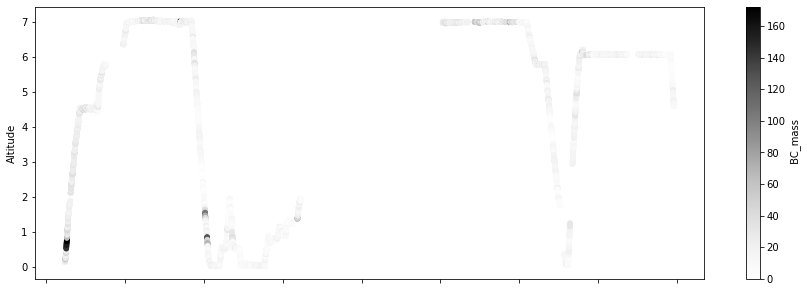

In [19]:
subset.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass')
plt.ylabel('Altitude')

Text(0, 0.5, 'Altitude')

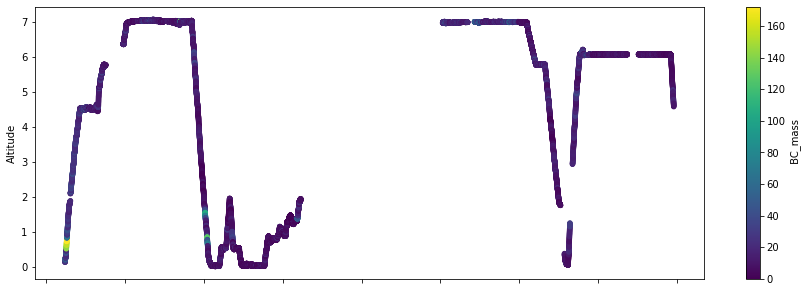

In [32]:
# _r on the colormap reverses. So viridis and viridis_r both work
subset.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass', colormap='viridis')
plt.ylabel('Altitude')

Notable arguments: vmin and vmax (changes color only - does not mask out data above/below that range), more?

#### Log color bar
(Note that this is different from log axis scale `ax.set_yscale("log")`)

In [34]:
import matplotlib.colors

TypeError: matplotlib.axes._axes.Axes.scatter() got multiple values for keyword argument 'norm'

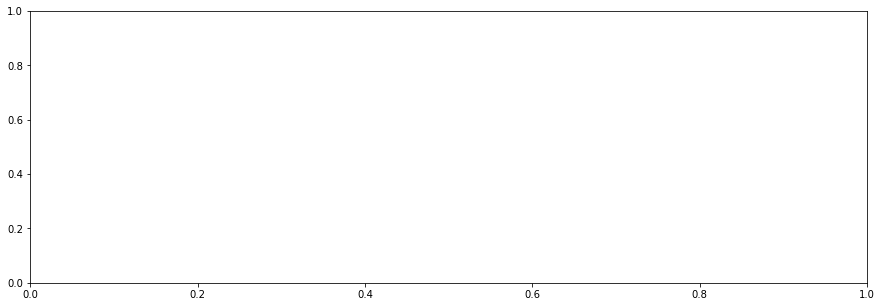

In [36]:
# something is conflicting with something here ... stack overflow post?
subset.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass', 
                    norm=matplotlib.colors.LogNorm())
plt.ylabel('Altitude')

In [37]:
import matplotlib.pyplot as plt

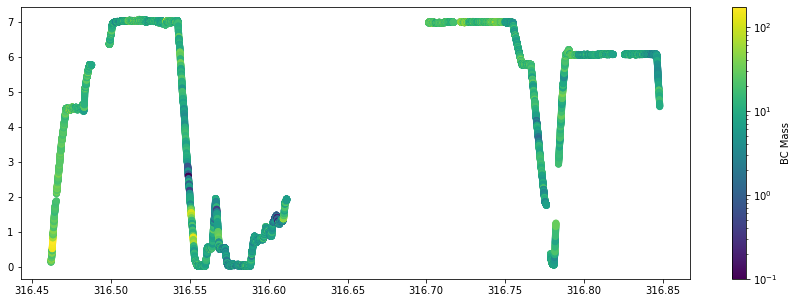

In [44]:
plt.scatter(subset[' Fractional_Day'], subset[' ALTP'], c=subset[' BC_mass'],
                    cmap='viridis', norm=matplotlib.colors.LogNorm())

plt.colorbar(label='BC Mass')

In [47]:
example_data = pd.DataFrame({'sample_no': [1, 2, 3, 4, 5, 6], 'data1': [10, 15, 12, 10, 13, 14], 
                'data2': [0.1, 1, 5, 10, 12, 5]})

In [62]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]

TypeError: matplotlib.axes._axes.Axes.scatter() got multiple values for keyword argument 'norm'

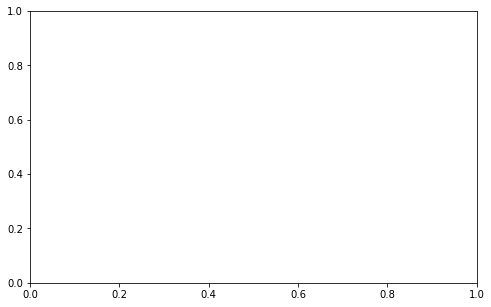

In [65]:
example_data.plot.scatter('sample_no', 'data1', c='data2', cmap='viridis',
                          norm=matplotlib.colors.LogNorm())

_Lesson time question -- give a real dataaset and ask them to check if the column is completely null or not_

In [26]:
subset[' DMS_MixingRatio'].info()

<class 'pandas.core.series.Series'>
Int64Index: 34399 entries, 0 to 34398
Series name:  DMS_MixingRatio
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 537.5 KB


### Researching visualization examples

Googling how to do something in a visualization has a bit of a different cadence as googling for analysis. Often in analysis you try to isolate the smallest possible piece of your problem and figure out how to do that one line. With plotting you are building up these larger blocks of code to accomplish your task, so when you are googling you have to pay more attention to how the example you are looking at made their graph early on.

Some things to pay attention to when googling examples for visualization:
- what is the type of interface this person is using (plt vs. fig vs. pandas)
- what object is the function they are using acting on?  Is it the plt? and ax? the fig? Keep in mind they may be using the same object but have given it a different name, so you often have to look back to how it was defined.

Using matplotlib gallery examples. (The names are and preview images are pretty good at targeting the matplotlib functionality that is being demonstrated in that gallery example)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import example data - flight from NAAMES campaign
naames = pd.read_csv('naames-mrg01-c130_merge_20151112_R5_thru20151123.csv', skiprows=223)
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})

In [7]:
x = naames[' Fractional_Day']
y = naames[' ALTP']

In [15]:
import matplotlib.colors

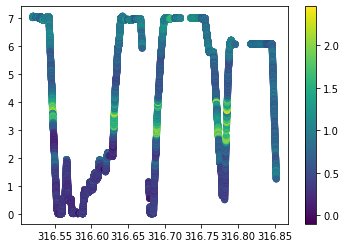

In [23]:
plt.scatter(x, y, c=naames[' Methanol_MixingRatio'])
plt.colorbar()

AttributeError: 'Colorbar' object has no attribute 'set_title'

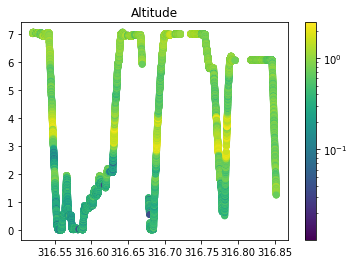

In [25]:
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=naames[' Methanol_MixingRatio'], cmap='viridis', 
            norm=matplotlib.colors.LogNorm())  # Instead of plt.plot() we use ax.plot()
ax.set_title('Altitude')
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_title('Methanol mixing ratio')
# Add a colorbar

Good example of tutorials point for debugging -- https://www.tutorialspoint.com/how-to-make-a-discrete-colorbar-for-a-scatter-plot-in-matplotlib 
* specific goal, code snippet, example of output

In [66]:
import matplotlib.pyplot as plt

print(plt.get_backend())

module://matplotlib_inline.backend_inline


In [72]:
%matplotlib notebook

ImportError: Failed to import any qt binding

In [67]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

/Users/rwegener/.pyenv/versions/miniconda3-4.7.12/envs/sarp/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


In [73]:
import PyQt5

ModuleNotFoundError: No module named 'PyQt5'